In [4]:
# Import Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [5]:
# Load sleep_data set into pandas
sleep_data = pd.read_csv("H:/Training/DU Boot Camp/Project1/Sleep_health_and_lifestyle_dataset.csv")
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
# No Null Values
# Identify types
sleep_data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [19]:
# Identify unique values

In [20]:
# Sleep - Physical Activity


In [21]:
# Does the need for sleep increase with age? (Stress)(Sleep duraation)(Sleep Quality)


In [7]:
# Group occupations
occupation = sleep_data["Occupation"].unique()
occupation

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [8]:
# How does gender correlate with occupation and average length of sleep?

occupation_data = sleep_data.groupby(["Occupation"])["Sleep Duration"].mean()
occupation_data

Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64

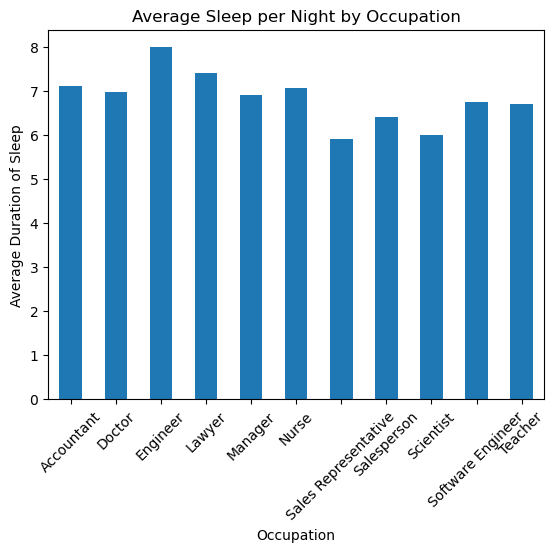

In [17]:
occupation_data.plot(kind='bar')
plt.title("Average Sleep per Night by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Duration of Sleep")
plt.xticks(rotation = 45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

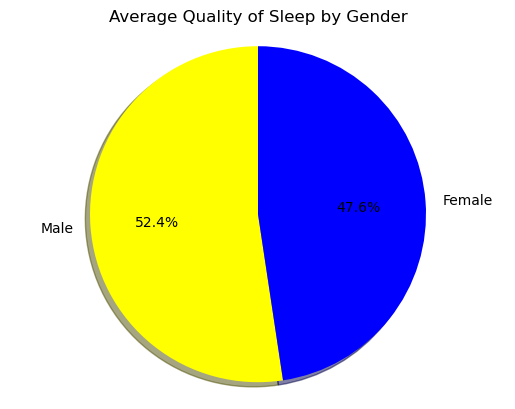

In [16]:
# On average are males or females getting better sleep? (lydia)
gender_sleep = sleep_data.groupby(["Gender"])["Quality of Sleep"].mean()
genders = ["Male", "Female"]
quality_sleep = gender_sleep
colors = ["yellow", "blue"]

plt.title("Average Quality of Sleep by Gender")
plt.pie(quality_sleep, labels=genders, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [22]:
#Mean, median, mode, min, max of quality of sleep - FIX THIS
mean_sleep_quality = occupation_data.mean()
median_sleep_quality = occupation_data.median()
mode_sleep_quality = occupation_data.mode()
min_sleep_quality = occupation_data.min()
max_sleep_quality = occupation_data.max()
print ("Average quality quality of sleep is ", mean_sleep_quality)
print("Median quality of sleep is ", median_sleep_quality)
print("Minimum quality of sleep is ", min_sleep_quality)
print("Maximum quality of sleep is ", max_sleep_quality)
print("Mode quality of sleep is ", mode_sleep_quality)    


Average quality quality of sleep is  6.835274057502622
Median quality of sleep is  6.9
Minimum quality of sleep is  5.9
Maximum quality of sleep is  7.987301587301587
Mode quality of sleep is  0     5.900000
1     6.000000
2     6.403125
3     6.690000
4     6.750000
5     6.900000
6     6.970423
7     7.063014
8     7.113514
9     7.410638
10    7.987302
Name: Sleep Duration, dtype: float64


In [ ]:
# do a chart on which gender is more in the occupations?

In [ ]:
# Occupation - BMI
# Run unique values
# replace normal weight with average
# drop "other" values